In [4]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import sympy as sp
from IPython.display import display, Math
from PIL import Image



# Quadratic Function Fitting using Least Squares

$$y=ax^2+bx+c$$

Find a, b, c  using LS by given 11 2D points, and plot it.


$A^-1 * A$^-1 * A

In [50]:
PointsX = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
PointsY = np.array([2.8, 1.0, -1.0, -2.3, -2.7, -3.0, -3.2, -2.0, -1.0, 0.4, 3.0])
Weights = np.array([1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1])

b = sp.Matrix(PointsY)

W = sp.Matrix(np.diag(Weights))
x_view = sp.Matrix([sp.Symbol("a"), sp.Symbol("b"), sp.Symbol("c")])
_A = sp.Symbol("A")
_T = sp.Symbol("T")
_b = sp.Symbol("b")
_W = sp.Symbol("W")

## 1.가중치 없이 그냥

In [61]:
A1 = sp.Matrix(np.stack([PointsX ** 2, PointsX, np.ones(PointsX.shape)], axis=1))

x: sp.Matrix = (A1.T @ A1).inv() @ A1.T @ b

display(sp.Unequality(sp.MatMul(A1, x_view), b, evalueate=False))


display("but we have min of least square by using: ")
display(Math("\symbf{x} = (\symbf{A}^T \symbf{A})^{-1} \symbf{A}^T \symbf{b}") )


display("and we get:")

display(sp.Equality(x_view, x))

Ne(Matrix([
[25.0, -5.0, 1.0],
[16.0, -4.0, 1.0],
[ 9.0, -3.0, 1.0],
[ 4.0, -2.0, 1.0],
[ 1.0, -1.0, 1.0],
[   0,    0, 1.0],
[ 1.0,  1.0, 1.0],
[ 4.0,  2.0, 1.0],
[ 9.0,  3.0, 1.0],
[16.0,  4.0, 1.0],
[25.0,  5.0, 1.0]])*Matrix([
[a],
[b],
[c]]), Matrix([
[ 2.8],
[ 1.0],
[-1.0],
[-2.3],
[-2.7],
[-3.0],
[-3.2],
[-2.0],
[-1.0],
[ 0.4],
[ 3.0]]))

'but we have min of least square by using: '

<IPython.core.display.Math object>

'and we get:'

Eq(Matrix([
[a],
[b],
[c]]), Matrix([
[   0.24044289044289],
[-0.0118181818181818],
[  -3.13170163170163]]))

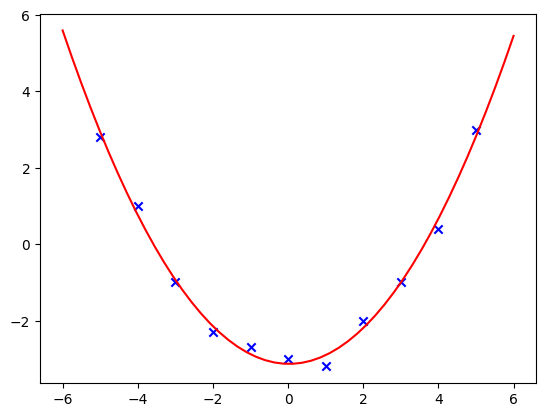

In [20]:
X = np.linspace(-6, 6)
Y = x[0] * X**2 + x[1]  * X + x[2]

plt.scatter(PointsX, PointsY, c='blue', marker='x')

plt.plot(X, Y, color='red')

## Using 11 Points with W

In [60]:
A2 = W @ A1

wb = W * b

xw = (A2.T @ A2).inv() @ A2.T @ wb

display("we want to lstsq with W")

display(sp.Unequality(sp.MatMul(sp.MatMul(_W, A1), x_view), sp.MatMul(_W, b)) )
display(sp.Unequality(sp.MatMul(sp.MatMul(W, A1), x_view), sp.MatMul(W, b)) )

display("and by using above procedure, we get:")

display(sp.Equality(x_view,xw))

'we want to lstsq with W'

Ne((W*Matrix([
[25.0, -5.0, 1.0],
[16.0, -4.0, 1.0],
[ 9.0, -3.0, 1.0],
[ 4.0, -2.0, 1.0],
[ 1.0, -1.0, 1.0],
[   0,    0, 1.0],
[ 1.0,  1.0, 1.0],
[ 4.0,  2.0, 1.0],
[ 9.0,  3.0, 1.0],
[16.0,  4.0, 1.0],
[25.0,  5.0, 1.0]]))*Matrix([
[a],
[b],
[c]]), W*Matrix([
[ 2.8],
[ 1.0],
[-1.0],
[-2.3],
[-2.7],
[-3.0],
[-3.2],
[-2.0],
[-1.0],
[ 0.4],
[ 3.0]]))

Ne((Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])*Matrix([
[25.0, -5.0, 1.0],
[16.0, -4.0, 1.0],
[ 9.0, -3.0, 1.0],
[ 4.0, -2.0, 1.0],
[ 1.0, -1.0, 1.0],
[   0,    0, 1.0],
[ 1.0,  1.0, 1.0],
[ 4.0,  2.0, 1.0],
[ 9.0,  3.0, 1.0],
[16.0,  4.0, 1.0],
[25.0,  5.0, 1.0]]))*Matrix([
[a],
[b],
[c]]), Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

'and by using above procedure, we get:'

Eq(Matrix([
[a],
[b],
[c]]), Matrix([
[   0.239604534329512],
[-0.00263157894736848],
[   -3.12009532397269]]))

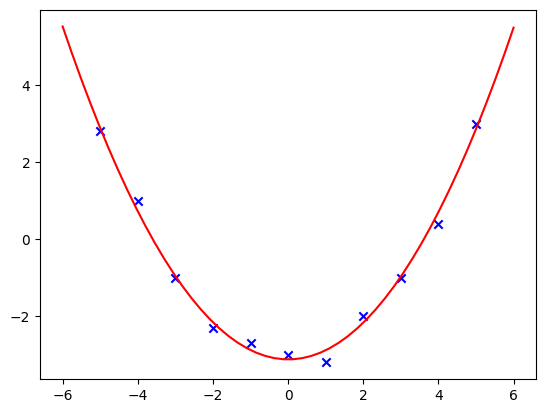

In [68]:
X = np.linspace(-6, 6)
Y = xw[0] * X ** 2 + xw[1] * X + xw[2]

plt.scatter(PointsX, PointsY, c='blue', marker='x')

plt.plot(X, Y, color='red')

## Using left 8

In [81]:
A3 = np.stack([PointsX[0:8] ** 2, PointsX[0:8], np.ones(PointsX[0:8].shape)], axis=1)

Y3 = PointsY[0:8]

a, b, c = inv(A3.T @ A3) @ A3.T @ Y3
print(a, b, c)

0.2404761904761903 -0.004761904761905439 -3.110714285714285


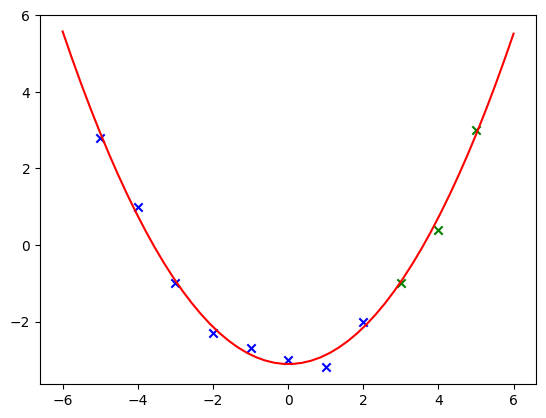

In [82]:
X = np.linspace(-6, 6)
Y = a * X ** 2 + b * X + c

plt.scatter(PointsX[0:8], PointsY[0:8], c='blue', marker='x')
plt.scatter(PointsX[8:], PointsY[8:], c='green', marker='x')

plt.plot(X, Y, color='red')

## Using right 8

In [83]:
A4 = np.stack([PointsX[3:] ** 2, PointsX[3:], np.ones(PointsX[3:].shape)], axis=1)

Y4 = PointsY[3:]

a, b, c = inv(A4.T @ A4) @ A4.T @ Y4
print(a, b, c)

0.24166666666666647 -0.013095238095237466 -3.1428571428571423


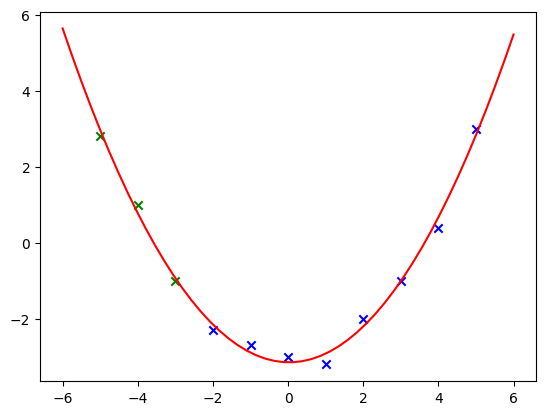

In [84]:
X = np.linspace(-6, 6)
Y = a * X ** 2 + b * X + c

plt.scatter(PointsX[3:], PointsY[3:], c='blue', marker='x')
plt.scatter(PointsX[:3], PointsY[:3], c='green', marker='x')

plt.plot(X, Y, color='red')

# Multi-lines Fitting using Least Squares

$y=ax+b$

Find $a$, $b$ using LS: Find the intersections of red and green respectively.

## How to do?
1. Select some 2D points at pixel coordinates on the same line, and find the optimal line equation using LS
2. Repeat 1 for other lines in the same direction
3. Find the intersections of lines in (1)-(2) in the same direction
4. Repeat (1)-(3) for other directions(red/green)

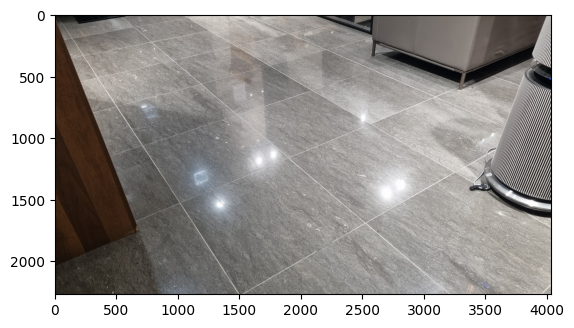

In [94]:
iX = np.array([343])
iY = np.array([])
with Image.open("line_fitting.jpg") as im:
    plt.imshow(im)

plt.show()